Task added successfully
Task added successfully


C:\Users\onur\AppData\Local\Temp\ipykernel_21040\3914029973.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task_data['Duration'] = task_data['End Time'] - task_data['Start Time']
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1008.0_x64__qbz5n2kfra8p0\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\onur\AppData\Local\Temp\ipykernel_21040\3914029973.py", line 78, in get_efficient_time
    day, time = to_do_list.get_efficient_time(task)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\onur\AppData\Local\Temp\ipykernel_21040\3914029973.py", line 38, in get

Tasks loaded successfully


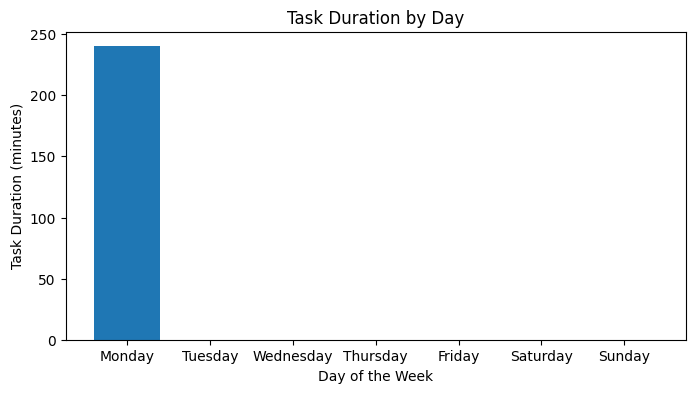

Tasks loaded successfully


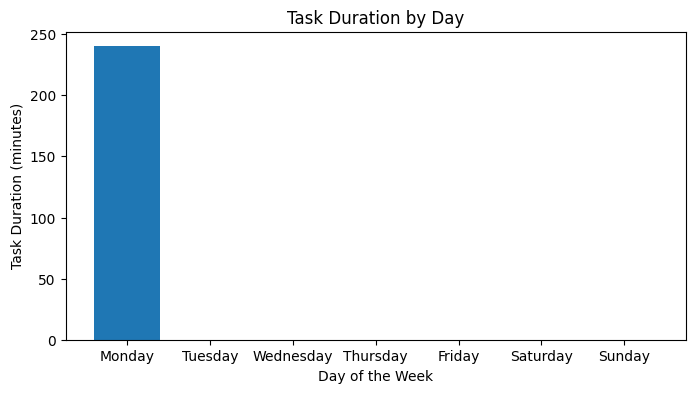

C:\Users\onur\AppData\Local\Temp\ipykernel_21040\3914029973.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task_data['Duration'] = task_data['End Time'] - task_data['Start Time']
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1008.0_x64__qbz5n2kfra8p0\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\onur\AppData\Local\Temp\ipykernel_21040\3914029973.py", line 78, in get_efficient_time
    day, time = to_do_list.get_efficient_time(task)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\onur\AppData\Local\Temp\ipykernel_21040\3914029973.py", line 38, in get

In [4]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import tkinter as tk

class ToDoList:
    def __init__(self):
        self.tasks = pd.DataFrame(columns=['Task', 'Day', 'Start Time', 'End Time'])
        self.day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    def add_task(self, task, day, start_time, end_time):
        if day not in self.day_order:
            print("Please enter a valid day of the week")
            return
        if start_time >= end_time:
            print("Start time must be before end time")
            return
        new_task = pd.DataFrame([[task, day, start_time, end_time]], columns=['Task', 'Day', 'Start Time', 'End Time'])
        self.tasks = pd.concat([self.tasks, new_task], ignore_index=True)
        print("Task added successfully")

    def save_to_csv(self):
        self.tasks.to_csv('tasks.csv', index=False)

    def load_from_csv(self):
        try:
            self.tasks = pd.read_csv('tasks.csv')
            print("Tasks loaded successfully")
        except FileNotFoundError:
            print("No tasks found")

    def get_efficient_time(self, task):
        task_data = self.tasks[self.tasks['Task'] == task]
        task_data.loc[:, 'Start Time'] = pd.to_datetime(task_data['Start Time'], format='%H:%M')
        task_data.loc[:, 'End Time'] = pd.to_datetime(task_data['End Time'], format='%H:%M')
        task_data['Duration'] = task_data['End Time'] - task_data['Start Time']
        task_data['Duration'] = task_data['Duration'].dt.total_seconds() / 60
        task_data = task_data.groupby('Day').sum()
        task_data['Efficiency'] = task_data['Duration'] / task_data['Duration'].sum()
        return task_data['Efficiency'].idxmax(), str(task_data['Start Time'].loc[task_data['Efficiency'].idxmax()].time())

    def plot_efficiency(self):
        plt.figure(figsize=(8, 4))
        for day in self.day_order:
            day_data = self.tasks[self.tasks['Day'] == day]
            day_data['Start Time'] = pd.to_datetime(day_data['Start Time'], format='%H:%M')
            day_data['End Time'] = pd.to_datetime(day_data['End Time'], format='%H:%M')
            day_data['Duration'] = day_data['End Time'] - day_data['Start Time']
            day_data['Duration'] = day_data['Duration'].dt.total_seconds() / 60
            plt.bar(day, day_data['Duration'].sum())
        plt.title('Task Duration by Day')
        plt.xlabel('Day of the Week')
        plt.ylabel('Task Duration (minutes)')
        plt.show()

def main():
    to_do_list = ToDoList()
    root = tk.Tk()

    def add_task():
        task = task_entry.get()
        day = day_entry.get()
        start_time = start_entry.get()
        end_time = end_entry.get()
        to_do_list.add_task(task, day, start_time, end_time)
        to_do_list.save_to_csv()
        task_entry.delete(0, tk.END)
        day_entry.delete(0, tk.END)
        start_entry.delete(0, tk.END)
        end_entry.delete(0, tk.END)

    def get_efficient_time():
        task = task_entry2.get()
        if task == '':
            return
        try:
            day, time = to_do_list.get_efficient_time(task)
            result_label.config(text=f"The most efficient time for {task} is {day} at {time}")
        except ValueError:
            result_label.config(text="Task not found")

    def load_tasks():
        to_do_list.load_from_csv()
        to_do_list.plot_efficiency()

    task_label = tk.Label(root, text="Task:")
    task_label.grid(row=0, column=0, padx=5, pady=5)
    task_entry = tk.Entry(root)
    task_entry.grid(row=0, column=1, padx=5, pady=5)

    day_label = tk.Label(root, text="Day:")
    day_label.grid(row=1, column=0, padx=5, pady=5)
    day_entry = tk.Entry(root)
    day_entry.grid(row=1, column=1, padx=5, pady=5)

    start_label = tk.Label(root, text="Start Time:")
    start_label.grid(row=2, column=0, padx=5, pady=5)
    start_entry = tk.Entry(root)
    start_entry.grid(row=2, column=1, padx=5, pady=5)

    end_label = tk.Label(root, text="End Time:")
    end_label.grid(row=3, column=0, padx=5, pady=5)
    end_entry = tk.Entry(root)
    end_entry.grid(row=3, column=1, padx=5, pady=5)

    add_button = tk.Button(root, text="Add Task", command=add_task)
    add_button.grid(row=4, column=0, columnspan=2, padx=5, pady=5)

    task_label2 = tk.Label(root, text="Task:")
    task_label2.grid(row=5, column=0, padx=5, pady=5)
    task_entry2 = tk.Entry(root)
    task_entry2.grid(row=5, column=1, padx=5, pady=5)

    get_button = tk.Button(root, text="Get Efficient Time", command=get_efficient_time)
    get_button.grid(row=6, column=0, columnspan=2, padx=5, pady=5)

    load_button = tk.Button(root, text="Load Tasks", command=load_tasks)
    load_button.grid(row=7, column=0, columnspan=2, padx=5, pady=5)

    result_label = tk.Label(root, text="")
    result_label.grid(row=8, column=0, columnspan=2, padx=5, pady=5)

    root.mainloop()

if __name__ == '__main__':
    main()

